In [1]:
from datasets import load_from_disk
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from tqdm import tqdm

from transformers import AutoTokenizer

In [2]:
# model_name = "klue/bert-base"
model_name = "xlm-roberta-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [3]:
len(tokenizer("나는 밥을 먹는다.")['input_ids'])

9

In [4]:
len(tokenizer("""그의 죽음으로 좌우합작위원회는 구심점을 잃게 된다. 제2차 미소공위는 추진하던 중 이후 중재자가 없어지자 극좌,극우 양극단 세력의 갈등이 표출하였고, 끝내 미국-소련의 입장만 확인한 채 1947년 10월에 제2차 미소공위는 완전히 결렬되어 미국이 한반도 문제를 UN으로 이관함으로써 좌우합작위원회는 1947년 12월에 공식 해체된다. 결국, '통일임시정부' 수립을 위한 좌우합작운동은 좌절되어 실패로 끝났고 한반도는 '남한 내 단독정부 수립'안이 확정되기에 이르렀다.\n\n1947년 7월 19일 여운형이 피습,절명하여 암살되었을 당시 갑작스런 그의 죽음은 많은 사람들에게 커다란 충격을 주었다. 1947년 8월 3일 광화문 인민당사 앞에서 발인식이 거행되었다. 그의 영결식은 인민장으로 치러졌다. \n\n영결식에 약 60여만명의 수많은 추모인파가 몰렸다고 한다. 이는 광복 이후 최다 인파가 모인 것인데, 민중들이 슬픔에 동참하기 위해 자발적으로 흰 옷을 입어서 서울시내가 하얗게 뒤덮였다고 한다. 영구는 결식장인 서울운동장(동대문운동장)으로 향해 서서히 갔고, 장례 행렬은 11시 40분에 서울운동장에 도착하여 영결식이 치러졌다. 서울 운동장에서 베를린 올림픽 마라톤 금메달리스트 손기정과 역도선수 김성집 등 체육인들이 그의 관을 운구하였다. \n\n그의 시신은 포르말린으로 방부처리되어 쇠로 만들어진 관에 안치되었다. 통일이 되는 날에 다시 장사를 지내기 위함이었다. 그가 죽자 미 군정장관 하지가 육각수은관을 미국에서 특별 주문해 가져왔다고 한다.\n\n 여운형의 묘소는 서울시 강북구 우이동에 안치되었으며 강북구 수유동에서 멀지 않은 솔밭공원 근처에 있다. 한 때 1961년 5.16 군사정변 직후 우이동 묘소 땅이 채윤혁 개인에게 불하받게 되어 여운형 시신이 오갈 데 없는 딱한 처지에 놓인 적이 있었다. 당시 국회의원이던 여운형의 동생 여운홍이 법적으로 어떻게 해볼 길이 없으니 대통령 박정희한테 직접 문제를 해결해달라고 부탁했다. 이에 대해 박정희는 "그 분 사상이 어떤지는 모르겠지만 독립운동을 했다는 것 자체만으로도 높이 평가할 만 하다."면서 좋게 해결해주었다고 한다. 그리고, 1965년 7월 19일에 공식적인 추모식이 열렸다\n1990년 조선민주주의인민공화국으로부터 조국통일상이 추서되었다.\n\n2007년 항일독립운동가단체 협의회로부터 신간회창립80주년을 기념하는 민족공동체 상이 추서되었다. 양평군에서는 생가 복원사업을 진행하고 있다.\n\n2005년 서울특별시 종로구 계동에 여운형집 터 표석이 설치되었다.""")['input_ids'])

Token indices sequence length is longer than the specified maximum sequence length for this model (717 > 512). Running this sequence through the model will result in indexing errors


717

# Explore TrainDataset

In [5]:
dataset = load_from_disk("../data/train_dataset/")
dataset

DatasetDict({
    train: Dataset({
        features: ['__index_level_0__', 'answers', 'context', 'document_id', 'id', 'question', 'title'],
        num_rows: 3952
    })
    validation: Dataset({
        features: ['__index_level_0__', 'answers', 'context', 'document_id', 'id', 'question', 'title'],
        num_rows: 240
    })
})

In [6]:
dataset['train']

Dataset({
    features: ['__index_level_0__', 'answers', 'context', 'document_id', 'id', 'question', 'title'],
    num_rows: 3952
})

In [7]:
def read_dataset(dataset, idx, mode):
    IDX = idx
    features = dataset[mode].features
    for feature in features:
        print("*"*50, feature, "*"*50)
        print(dataset[mode][IDX][feature])

In [8]:
read_dataset(dataset, 100, "train")

************************************************** __index_level_0__ **************************************************
1081
************************************************** answers **************************************************
{'answer_start': [947], 'text': ['대통령 박정희']}
************************************************** context **************************************************
그의 죽음으로 좌우합작위원회는 구심점을 잃게 된다. 제2차 미소공위는 추진하던 중 이후 중재자가 없어지자 극좌,극우 양극단 세력의 갈등이 표출하였고, 끝내 미국-소련의 입장만 확인한 채 1947년 10월에 제2차 미소공위는 완전히 결렬되어 미국이 한반도 문제를 UN으로 이관함으로써 좌우합작위원회는 1947년 12월에 공식 해체된다. 결국, '통일임시정부' 수립을 위한 좌우합작운동은 좌절되어 실패로 끝났고 한반도는 '남한 내 단독정부 수립'안이 확정되기에 이르렀다.\n\n1947년 7월 19일 여운형이 피습,절명하여 암살되었을 당시 갑작스런 그의 죽음은 많은 사람들에게 커다란 충격을 주었다. 1947년 8월 3일 광화문 인민당사 앞에서 발인식이 거행되었다. 그의 영결식은 인민장으로 치러졌다. \n\n영결식에 약 60여만명의 수많은 추모인파가 몰렸다고 한다. 이는 광복 이후 최다 인파가 모인 것인데, 민중들이 슬픔에 동참하기 위해 자발적으로 흰 옷을 입어서 서울시내가 하얗게 뒤덮였다고 한다. 영구는 결식장인 서울운동장(동대문운동장)으로 향해 서서히 갔고, 장례 행렬은 11시 40분에 서울운동장에 도착하여 영결식이 치러졌다. 서울 운동장에서 베를린 올림픽 마라톤 금메달리스트 손기정

In [9]:
read_dataset(dataset, 100, "validation")

************************************************** __index_level_0__ **************************************************
240
************************************************** answers **************************************************
{'answer_start': [191], 'text': ['수녀']}
************************************************** context **************************************************
캐서린 스윈포드는 원래 캐서린 드 로애로 태어났다. 그녀의 아버지는 "파옹"으로 알려진 질 드 로애였다. 파옹 드 로애는 원래 에노 출신으로 에드워드3세의 왕비 필리파의 수행원으로 잉글랜드에 왔으며, 후에 기사 작위와 영지를 얻는다. 어머니에 대해서는 알려진바가 없다. 형제로는 오빠이자 후에 흑태자 에드워드의 측근으로 일한 월터 드 로애와 수녀가 된 언니 엘리자베스 드 로애와 "캔터베리 이야기"로 유명한 초서의 부인이 된 동생 필리파 드 로애가 있다.\n캐서린은 휴 스윈포드경과 결혼했고 그와의 사이에 적어도 네명의 아이를 낳았다.\n랭카스터 공작 부인이었던 랭카스터의 블랜치가 죽은 3년후 그의 정부가 되었고 오래도록 랭카스터 공작의 정부로 남았다.\n랭카스터 공작 곤트의 존의 두 번째 부인이 죽자, 그는 정식으로 캐서린과 결혼했다. 랭카스터 공작부인이 된 후 왕국에서 서열 2위의 여성으로 중요한 행사에서 중요한 임무를 수행했으며, 의붓아들인 볼링블룩의 헨리가 헨리 4세로 즉위한후 그녀는 국왕의 어머니로 대접받았다.
************************************************** document_id **********************************

In [10]:
index_level = []
answers = []
context = []
document_id = []
mrc_id = []
question = []
title = []

for data in tqdm(dataset['train']):
    index_level.append(data['__index_level_0__'])
    answers.append(data['answers'])
    context.append(data['context'])
    document_id.append(data['document_id'])
    mrc_id.append(data['id'])
    question.append(data['question'])
    title.append(data['title'])
    
train = pd.DataFrame({"index_level":index_level,
                     "answers":answers,
                     "context":context,
                     "document_id":document_id,
                     "mrc_id":mrc_id,
                     "question":question,
                     "title":title})
train.head()

100%|██████████| 3952/3952 [00:00<00:00, 10687.92it/s]


,index_level,answers,context,document_id,mrc_id,question,title
0,42,"{'answer_start': [235], 'text': ['하원']}",미국 상의원 또는 미국 상원(United States Senate)은 양원제인 미국...,18293,mrc-1-000067,대통령을 포함한 미국의 행정부 견제권을 갖는 국가 기관은?,미국 상원
1,2873,"{'answer_start': [212], 'text': ['《경영의 실제》']}",'근대적 경영학' 또는 '고전적 경영학'에서 현대적 경영학으로 전환되는 시기는 19...,51638,mrc-0-004397,현대적 인사조직관리의 시발점이 된 책은?,인사조직관리
2,230,"{'answer_start': [510], 'text': ['백성']}",강희제는 강화된 황권으로 거의 황제 중심의 독단적으로 나라를 이끌어 갔기에 자칫 전...,5028,mrc-1-000362,강희제가 1717년에 쓴 글은 누구를 위해 쓰여졌는가?,강희제
3,992,"{'answer_start': [625], 'text': ['중국']}","불상을 모시기 위해 나무나 돌, 쇠 등을 깎아 일반적인 건축물보다 작은 규모로 만든...",34146,mrc-0-001510,11~12세기에 제작된 본존불은 보통 어떤 나라의 특징이 전파되었나요?,금동삼존불감
4,548,"{'answer_start': [30], 'text': ['4개']}",동아대학교박물관에서 소장하고 있는 계사명 사리구는 총 4개의 용기로 구성된 조선후기...,47334,mrc-0-000823,명문이 적힌 유물을 구성하는 그릇의 총 개수는?,계사명 사리구


In [11]:
train['answers_start'] = [data['answer_start'][0] for data in train['answers']]
train['answers'] = [data['text'][0] for data in train['answers']]
train.head()

,index_level,answers,context,document_id,mrc_id,question,title,answers_start
0,42,하원,미국 상의원 또는 미국 상원(United States Senate)은 양원제인 미국...,18293,mrc-1-000067,대통령을 포함한 미국의 행정부 견제권을 갖는 국가 기관은?,미국 상원,235
1,2873,《경영의 실제》,'근대적 경영학' 또는 '고전적 경영학'에서 현대적 경영학으로 전환되는 시기는 19...,51638,mrc-0-004397,현대적 인사조직관리의 시발점이 된 책은?,인사조직관리,212
2,230,백성,강희제는 강화된 황권으로 거의 황제 중심의 독단적으로 나라를 이끌어 갔기에 자칫 전...,5028,mrc-1-000362,강희제가 1717년에 쓴 글은 누구를 위해 쓰여졌는가?,강희제,510
3,992,중국,"불상을 모시기 위해 나무나 돌, 쇠 등을 깎아 일반적인 건축물보다 작은 규모로 만든...",34146,mrc-0-001510,11~12세기에 제작된 본존불은 보통 어떤 나라의 특징이 전파되었나요?,금동삼존불감,625
4,548,4개,동아대학교박물관에서 소장하고 있는 계사명 사리구는 총 4개의 용기로 구성된 조선후기...,47334,mrc-0-000823,명문이 적힌 유물을 구성하는 그릇의 총 개수는?,계사명 사리구,30


### Train - context, question, answer 길이

In [12]:
len_context = [len(tokenizer(txt)['input_ids']) for txt in train['context']]
len_question = [len(tokenizer(txt)['input_ids']) for txt in train['question']]
len_answer = [len(tokenizer(txt)['input_ids']) for txt in train['answers']]

In [13]:
# 길이 분포 확인용 함수
def length_dist(dataset, desc):
    sns.distplot(dataset, kde=True)
    plt.ylabel(desc)
    plt.show()
    print("avg : ", sum(dataset)//len(dataset))
    print("min : ", min(dataset))
    print("max : ", max(dataset))

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


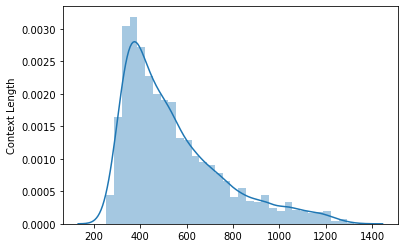

avg :  542
min :  255
max :  1322


In [14]:
# context 길이 분포
length_dist(len_context, "Context Length")

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


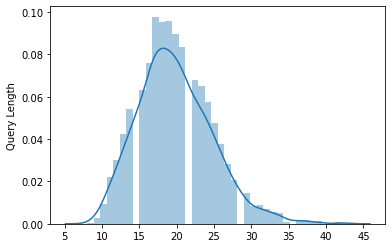

avg :  19
min :  8
max :  43


In [15]:
# question 길이 분포
length_dist(len_question, "Query Length")

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


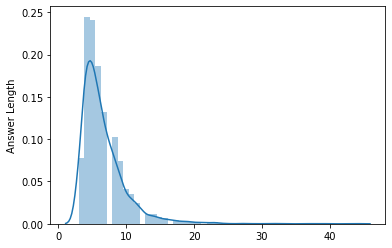

avg :  6
min :  3
max :  44


In [16]:
# answer 길이 분포
length_dist(len_answer, "Answer Length")

### Validation - context, question, answer 길이

In [17]:
index_level = []
answers = []
context = []
document_id = []
mrc_id = []
question = []
title = []

for data in tqdm(dataset['validation']):
    index_level.append(data['__index_level_0__'])
    answers.append(data['answers'])
    context.append(data['context'])
    document_id.append(data['document_id'])
    mrc_id.append(data['id'])
    question.append(data['question'])
    title.append(data['title'])
    
valid = pd.DataFrame({"index_level":index_level,
                     "answers":answers,
                     "context":context,
                     "document_id":document_id,
                     "mrc_id":mrc_id,
                     "question":question,
                     "title":title})
valid.head()

100%|██████████| 240/240 [00:00<00:00, 10240.21it/s]


,index_level,answers,context,document_id,mrc_id,question,title
0,2146,"{'answer_start': [284], 'text': ['한보철강']}","순천여자고등학교 졸업, 1973년 이화여자대학교를 졸업하고 1975년 제17회 사법...",9027,mrc-0-003264,처음으로 부실 경영인에 대한 보상 선고를 받은 회사는?,전효숙
1,3106,"{'answer_start': [146], 'text': ['1871년']}",요크 카운티 동쪽에 처음으로 여객 열차 운행이 시작한 시점은 1868년 토론토 & ...,51765,mrc-0-004762,스카버러 남쪽과 코보콘그 마을의 철도 노선이 처음 연장된 연도는?,스토우빌선
2,1180,"{'answer_start': [517], 'text': ['나뭇잎']}","촐라 정부\n 촐라의 정부 체제는 전제군주제였으며,2001 촐라의 군주는 절대적인 ...",15694,mrc-1-001810,촌락에서 운영 위원 후보자 이름을 쓰기위해 사용된 것은?,촐라
3,141,"{'answer_start': [1109], 'text': ['금대야']}",프랑스의 십자군 무훈시는 1099년 예루살렘 왕국의 통치자가 된 고드프루아 드 부용...,59536,mrc-1-000219,로타이르가 백조를 구하기 위해 사용한 것은?,백조 기사
4,184,"{'answer_start': [386], 'text': ['수평적 관계']}",탈관료제화는 현대사회에서 관료제 성격이 약화되는 현상이다. 현대사회에서 관료제는 약...,32991,mrc-1-000285,의견을 자유롭게 나누는 것은 조직 내 어떤 관계에서 가능한가?,탈관료제화


In [18]:
valid['answers_start'] = [data['answer_start'][0] for data in valid['answers']]
valid['answers'] = [data['text'][0] for data in valid['answers']]
valid.head()

,index_level,answers,context,document_id,mrc_id,question,title,answers_start
0,2146,한보철강,"순천여자고등학교 졸업, 1973년 이화여자대학교를 졸업하고 1975년 제17회 사법...",9027,mrc-0-003264,처음으로 부실 경영인에 대한 보상 선고를 받은 회사는?,전효숙,284
1,3106,1871년,요크 카운티 동쪽에 처음으로 여객 열차 운행이 시작한 시점은 1868년 토론토 & ...,51765,mrc-0-004762,스카버러 남쪽과 코보콘그 마을의 철도 노선이 처음 연장된 연도는?,스토우빌선,146
2,1180,나뭇잎,"촐라 정부\n 촐라의 정부 체제는 전제군주제였으며,2001 촐라의 군주는 절대적인 ...",15694,mrc-1-001810,촌락에서 운영 위원 후보자 이름을 쓰기위해 사용된 것은?,촐라,517
3,141,금대야,프랑스의 십자군 무훈시는 1099년 예루살렘 왕국의 통치자가 된 고드프루아 드 부용...,59536,mrc-1-000219,로타이르가 백조를 구하기 위해 사용한 것은?,백조 기사,1109
4,184,수평적 관계,탈관료제화는 현대사회에서 관료제 성격이 약화되는 현상이다. 현대사회에서 관료제는 약...,32991,mrc-1-000285,의견을 자유롭게 나누는 것은 조직 내 어떤 관계에서 가능한가?,탈관료제화,386


In [19]:
val_len_context = [len(tokenizer(txt)['input_ids']) for txt in valid['context']]
val_len_question = [len(tokenizer(txt)['input_ids']) for txt in valid['question']]
val_len_answer = [len(tokenizer(txt)['input_ids']) for txt in valid['answers']]

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


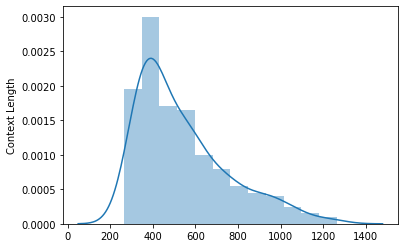

avg :  540
min :  264
max :  1264


In [20]:
length_dist(val_len_context, "Context Length")

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


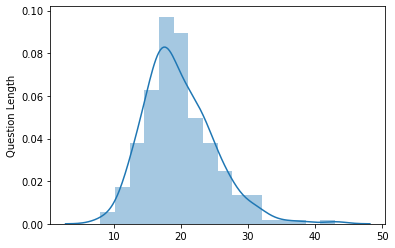

avg :  19
min :  8
max :  43


In [21]:
length_dist(val_len_question, "Question Length")

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


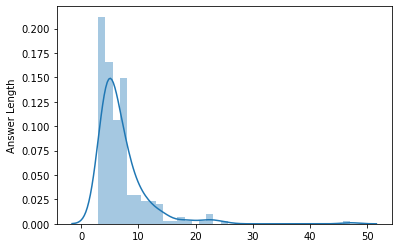

avg :  7
min :  3
max :  47


In [22]:
length_dist(val_len_answer, "Answer Length")

### Train, Validation Dataset의 길이 분포는 context, question, answer에 대해서 거의 유사  
### 단, max length 에 근접하는 text들의 경우 잘리지 않는지 관찰 필요
### baseline : max_seq_len = 384(token), max_answer_length = 30(index)

In [23]:
# context에서 잘리는 비율
train_long_idx = []
valid_long_idx = []
for i, length in enumerate(len_context):
    if length >= 384:
        train_long_idx.append(i)
for i, length in enumerate(val_len_context):
    if length >= 384:
        valid_long_idx.append(i)
print("Ratio of Truncation - TrainDataset : {:.3f}".format(len(train_long_idx)/len(train)))
print("Ratio of Truncation - ValidDataset : {:.3f}".format(len(valid_long_idx)/len(valid)))

Ratio of Truncation - TrainDataset : 0.737
Ratio of Truncation - ValidDataset : 0.729


In [24]:
# answer에서 잘리는 비율
train_long_idx_ans = []
valid_long_idx_ans = []
for i, length in enumerate(len_answer):
    if length >= 30:
        train_long_idx_ans.append(i)
for i, length in enumerate(val_len_answer):
    if length >= 30:
        valid_long_idx_ans.append(i)
print("Ratio of Truncation - TrainDataset : {:.3f}".format(len(train_long_idx_ans)/len(train)))
print("Ratio of Truncation - ValidDataset : {:.3f}".format(len(valid_long_idx_ans)/len(valid)))

Ratio of Truncation - TrainDataset : 0.002
Ratio of Truncation - ValidDataset : 0.004


위에서는 answer_length도 토큰기준으로 분석했으나 실제로는 index length 기준이고  
토론 게시판에서 이를 넘는 비율이 1.6%라고 한다

### [UNK] 포함 context

In [25]:
print(tokenizer("뗴")["input_ids"])
print(tokenizer.decode(tokenizer("뗴")["input_ids"]))
# [UNK] 해당 input_id == 1
print(tokenizer.decode([3]))

[0, 6, 3, 2]
<s> <unk></s>
<unk>


In [26]:
def has_unk(contexts):
    unk_ids = []
    unk_context = []
    for i, context in tqdm(enumerate(contexts)):
        encoded = tokenizer(context)['input_ids']
        if 3 in encoded:
            unk_ids.append(i)
            unk_context.append(context)
            continue
    return unk_ids, unk_context

In [27]:
unk_train_ids, unk_train_contexts = has_unk(list(train['context']))
unk_valid_ids, unk_valid_contexts = has_unk(list(valid['context']))

3952it [00:06, 582.97it/s]
240it [00:00, 580.81it/s]


In [28]:
len(unk_train_ids), len(unk_valid_ids)

(260, 13)

In [29]:
IDX = unk_train_ids[11]
print(tokenizer.decode(tokenizer(train['context'][IDX])['input_ids']))
print(train['answers'][IDX])

<s> 그러나 한편으로는 미국 사회의 인종차별주의적, 흑인을 차별하는 태도를 목격하면서 백인들의 오만함에 대한 부정적인 생각을 갖게 되었다. 미국 체류 중 황인종을 멸시하는 백인 불량배들에게 끌려가 가끔 얻어맞기도 하고, “유색 인종”이라는 이유로 호텔 투숙을 거절당해 정거장에서 밤을 지<unk>는가 하면, 세례 교인이었던 그와 가장 가까워야 할 미국인 선교사에게마저 늘 은근히 - 그리고 가끔은 매우 노골적으로 - “왕따”당하는 처지였다 귀국 이후에 조선에서 만난 미국인 선교사들도 비슷하게 그를 대우했다.\n\n당시의 그에 대해 후일 노르웨이 오슬로 대학 교수 박노자는 '백인 인종주의에 상처받아 만신창이가 되었을 그의 마음 상태 '를 지적하기도 했다.\n\n만약 내가 마음대로 내 고국을 선택할 수 있다면, 나는 일본을 선택할 것이다. 오, 축복받은 일본이여! 동방의 낙원이여! |1893년 11월 1일자 일기 \n\n그는 평소 조선인들의 불결한 위생과 겉치레, 감정적 대응 등을 내심 경멸해왔다. 그리고 서구의 기독교사상과 일한 만큼만 대가를 받는다는 청교도 정신, 합리주의의 수용을 통해 이를 개선하려 했다. 그러나 평소 기독교선교사들로부터도 자기 일 처리도 못하는 작은 아이, 원주민, 예의를 지키지 않아도 될 만한 사람의 대접을 늘 받아 온 윤치호는, 인종주의야말로 미국의 가장 중요한 특징이라는 결론을 내리게 되었다 그 뒤 그는 조선에도 민주주의와 자유주의, 기독교 정신의 도입이 시급하다고 봤다. 그러나 미국의 민주주의와 자유주의, 기독교 사상과 개척정신은 높이 평가하면서도 내심 백인종을 혐오하는 이중적인 태도와 인종주의적인 사고를 갖게 되었다.\n\n어느 교회에서 남부 출신 남감리교회 목사들이 예배 시간에 흑인을 박멸해야 된다는 설교, 흑인들을 아프리카로 추방해야 된다는 설교를 듣고는 충격을 받기도 했다 그들이 목사인가 기독교인인가 자체를 의심하기도 했다. 하지만 흑인이 백인들로부터 차별대우를 받는 것에는 분노하면서도 흑인에 대해서는 1893년 2월 17일자 

### 문장 내 줄바꿈 "\n" -> [UNK] n [UNK] 처리됨
### 줄바꿈 기호 그냥 일괄적으로 없애버려도 괜찮을 듯

In [30]:
def print_unk(lst):
    cnt = 0
    for txt in lst:
        encoded = tokenizer(txt)['input_ids']
        if 3 in encoded:
            cnt += 1
            print("-"*100)
            print(txt)
            print(tokenizer.decode(encoded, skip_special_tokens=True))
    print(f"Number of [UNK] tokens included : {cnt} / {len(lst)}")

In [31]:
print_unk(list(train['question']))

----------------------------------------------------------------------------------------------------
배곯는 아이들에게 도움이 된 식량 보급 제도는?
배는 아이들에게 도움이 된 식량 보급 제도는?
----------------------------------------------------------------------------------------------------
1968년 대선 당시 후보로 출마된 수퇘지의 이름은?
1968년 대선 당시 후보로 출마된 수지의 이름은?
----------------------------------------------------------------------------------------------------
선발 투수로서 첫 해에 젱킨스의 삼진 갯수는?
선발 투수로서 첫 해에 킨스의 삼진 갯수는?
----------------------------------------------------------------------------------------------------
부녀자가 얼굴을 가리기위해 썻던 것 중, 고려시대에 사용한 것은?
부녀자가 얼굴을 가리기위해 던 것 중, 고려시대에 사용한 것은?
----------------------------------------------------------------------------------------------------
그리스를 배반한 인물이 테르모퓔라이 습격을 돕기 위해 말해준 것은?
그리스를 배반한 인물이 테르모라이 습격을 돕기 위해 말해준 것은?
----------------------------------------------------------------------------------------------------
하탸야 중위가 니도로 섬 동부에 상륙할 당시 이용한 보트는 어느 부대 소속인가?
하야 중위가 니도로 섬 동부에 상륙할 당시 이용한 보트는 어느 부대 

In [32]:
print_unk(list(train['answers']))

----------------------------------------------------------------------------------------------------
우전왕(優塡王)식 착의법
우전왕(優王)식 착의법
----------------------------------------------------------------------------------------------------
햣켄 해자
켄 해자
----------------------------------------------------------------------------------------------------
정기필(鄭夔弼)
정기필(鄭弼)
----------------------------------------------------------------------------------------------------
매개념(媒槪念)
매개념(媒念)
----------------------------------------------------------------------------------------------------
애혼성(愛琿城, 아이훈 성)
애혼성(愛城, 아이훈 성)
----------------------------------------------------------------------------------------------------
왝시 고든
시 고든
----------------------------------------------------------------------------------------------------
마드리드의 에스파뇰 극장
마드리드의 에스파 극장
----------------------------------------------------------------------------------------------------
오툉의 리첼다
오의 리첼다
Number of [UNK] tokens included : 8 

### question, answer에서 각각 2% 정도 [UNK]로 인한 누락 발생

In [33]:
train.to_csv("./train.csv", index=False)
valid.to_csv("./valid.csv", index=False)

# Explore TestDataset

In [34]:
test_test = load_from_disk('../data/test_dataset/')

In [35]:
test_test

DatasetDict({
    validation: Dataset({
        features: ['id', 'question'],
        num_rows: 600
    })
})

In [36]:
read_dataset(test_test, 0, "validation")

************************************************** id **************************************************
mrc-1-000653
************************************************** question **************************************************
유령'은 어느 행성에서 지구로 왔는가?


In [37]:
read_dataset(test_test, 100, "validation")

************************************************** id **************************************************
mrc-0-004345
************************************************** question **************************************************
셰이크 무지부르 라흐만의 딸이 처음으로 선거에서 졌던 해는?


### 위의 분석으로 보아 question에서 max_seq_length인 384를 넘길 일은 거의 없을 듯 하여
### [UNK] 포함된 question이 있는지 확인

In [38]:
test_ids = []
test_query = []
for data in tqdm(test_test['validation']):
    test_ids.append(data['id'])
    test_query.append(data['question'])
    
test = pd.DataFrame({"id":test_ids, "question":test_query})
test.head()

100%|██████████| 600/600 [00:00<00:00, 28115.73it/s]


,id,question
0,mrc-1-000653,유령'은 어느 행성에서 지구로 왔는가?
1,mrc-1-001113,용병회사의 경기가 좋아진 것은 무엇이 끝난 이후부터인가?
2,mrc-0-002191,돌푸스에게 불특정 기간동안 하원이 잠시 쉬는 것을 건의 받았던 인물은?
3,mrc-0-003951,"마오리언어와 영어, 뉴질랜드 수화를 공식 언어로 사용하는 나라는?"
4,mrc-1-001272,디엔비엔푸 전투에서 보응우옌잡이 상대한 국가는?


In [39]:
print_unk(list(test['question']))

----------------------------------------------------------------------------------------------------
철툇자루를 제작하는데 주로 활용된 재료는?
철자루를 제작하는데 주로 활용된 재료는?
----------------------------------------------------------------------------------------------------
쿠틉 앗딘이 이라크에 있는 칼리프 영지를 점거하기 위해 출정을 시작한 지역은?
쿠 앗딘이 이라크에 있는 칼리프 영지를 점거하기 위해 출정을 시작한 지역은?
Number of [UNK] tokens included : 2 / 600


### 마찬가지로 2% 정도의 question이 [UNK] 포함

In [40]:
test.to_csv("./test.csv")

### 현재까지 결론 : xlm-roberta-large > klue/bert = klue/roberta